In [1]:
#install.packages("igraph")

In [1]:
library(igraph)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
# install.packages("gsubfn")
library(gsubfn) #allows unpacking multiple return values from functions without using a dummy variable (but needs a fresh R session to work, intitially)

Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"

In [3]:
printf <- function(...) cat(sprintf(...))

In [4]:
logspace <- function( d1, d2, n) exp(log(10)*seq(d1, d2, length.out=n))

In [5]:
remove_zero_freqs = function(distr){
    return (list((1:length(distr))[distr>0], distr[distr>0]))
}

In [19]:
fit_line = function(x, y, log=FALSE){
    if(log){
        slope <- getElement(lm(log(y) ~ log(x))$coefficients[2], "log(x)")
        intercept <- getElement(lm(log(y) ~ log(x))$coefficients[1], "(Intercept)")
    }
    else{
        slope <- getElement(lm(y ~ x)$coefficients[2], "x")
        intercept <- getElement(lm(y ~ x)$coefficients[1], "(Intercept)")
    }
    return (list(slope, intercept))
}

# Part 1 Q-2 

## (a)

In [6]:
g1 = sample_pa(n=1000, m=1, directed=F)

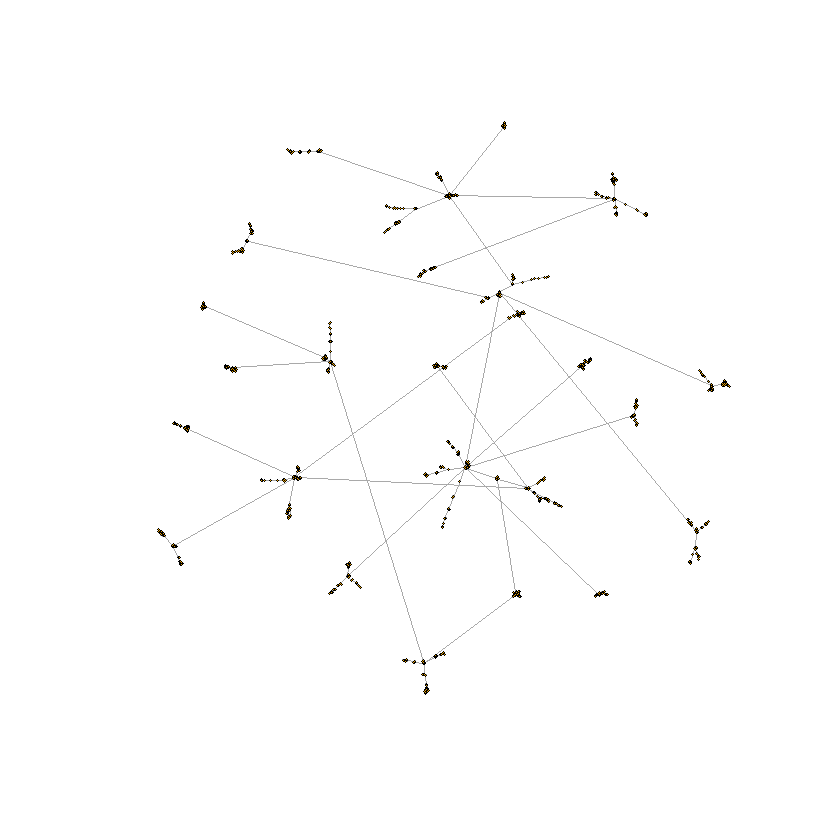

In [12]:
plot(g1, vertex.size=1, vertex.label=NA)

## (b)

In [14]:
comms1 = cluster_fast_greedy(g1, modularity=TRUE)

In [15]:
print(names(comms1))

[1] "merges"     "modularity" "membership" "algorithm"  "vcount"    


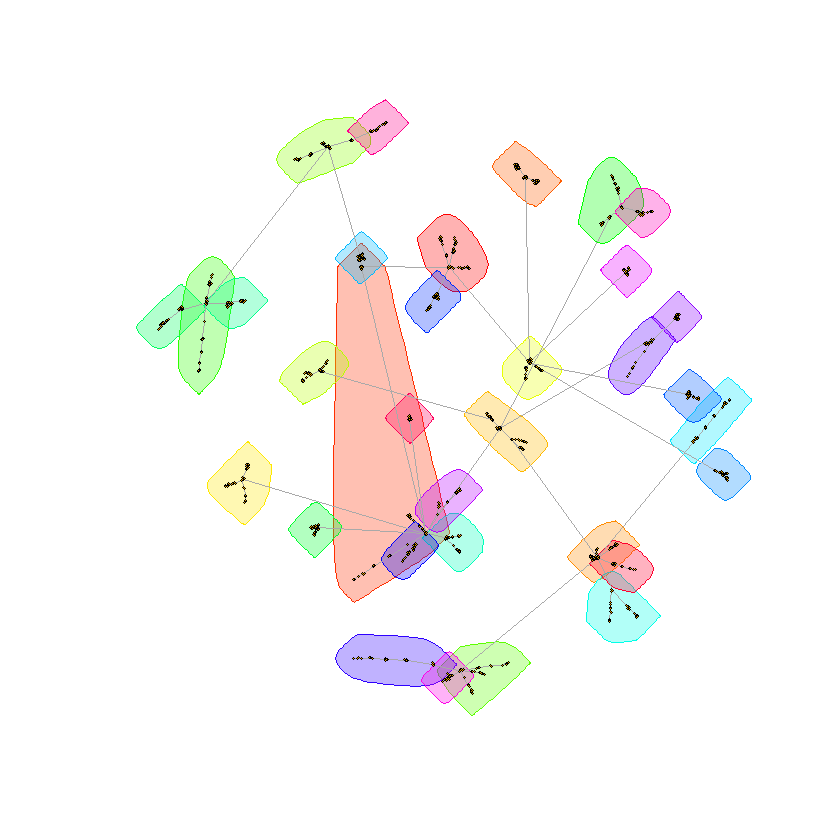

In [16]:
plot(g1, mark.groups=groups(comms1), vertex.size=1, vertex.label=NA)

In [17]:
print(modularity(comms))

[1] 0.9782903


## (c)

In [10]:
g2 = sample_pa(n=10000, m=1, directed=F)
comms = cluster_fast_greedy(g2, modularity=TRUE)
print(modularity(comms))

[1] 0.9782903


In [23]:
draw_degree_distribution = function(g, m){
    list[degrees, degree_freq] <- remove_zero_freqs(degree_distribution(g))
    list[slope, int] <- fit_line(degrees, degree_freq, log=TRUE)
    plot(log(degrees), log(degree_freq), type="b", xlab="Degree", ylab="Frequency", main=sprintf("n=%d, m=%d, slope=%.4f", vcount(g), m, slope))
    abline(lm(log(degree_freq) ~ log(degrees)), col="red")
    return (slope)
}

## (d)

[1] -2.890577

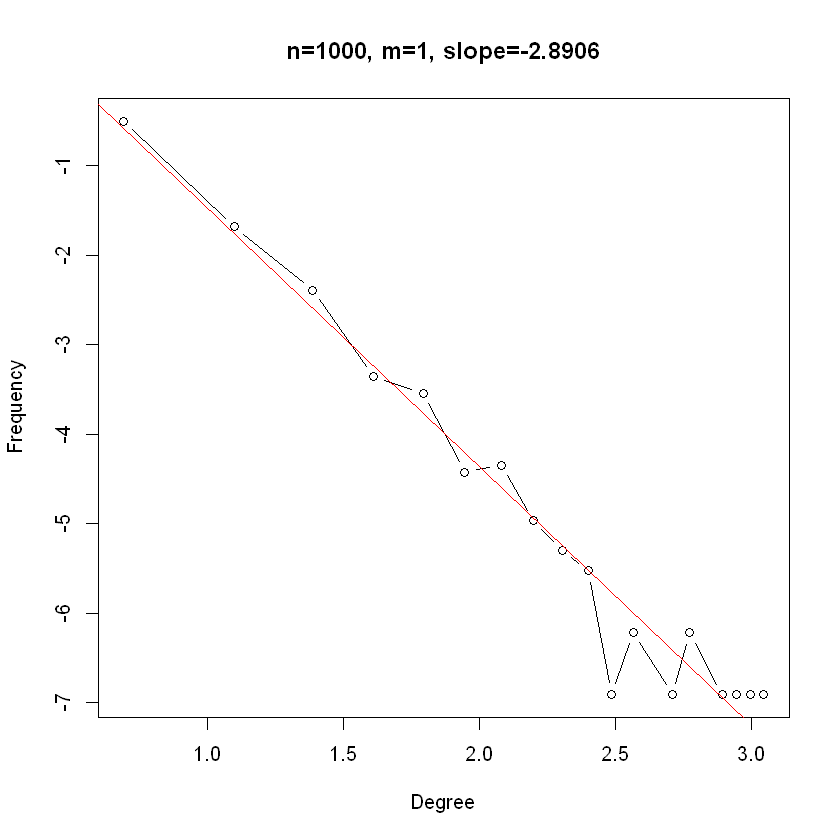

In [24]:
draw_degree_distribution(g1, 1)

[1] -2.918375

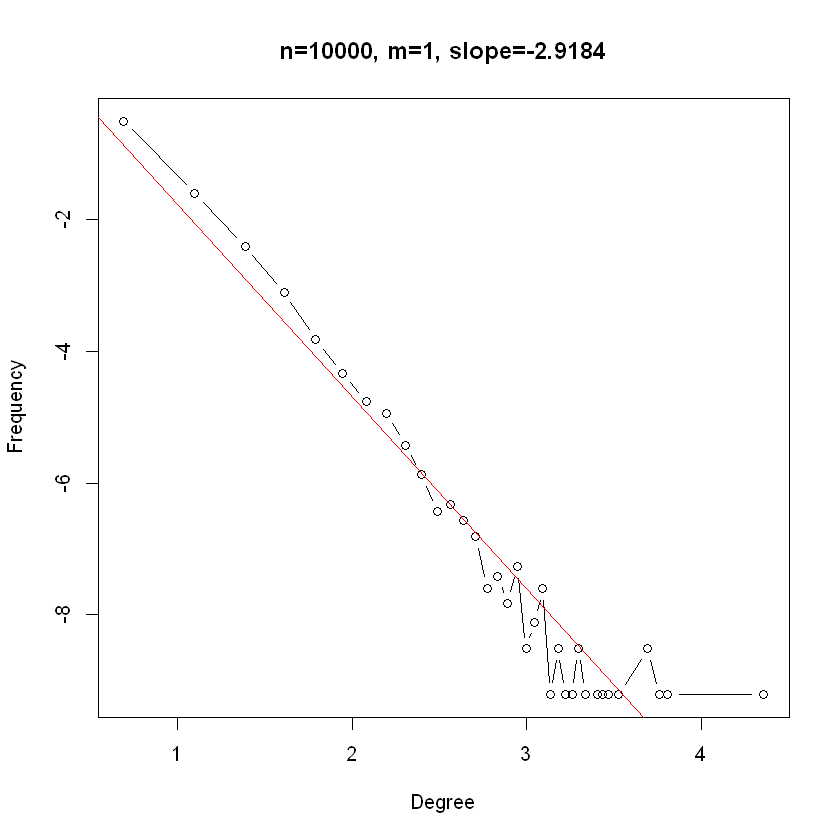

In [25]:
draw_degree_distribution(g2, 1)

In [28]:
random_gen_pa = function(g){
    vertices = V(g)
    n_vert = vcount(g)
    curr_neighborhood = vertices
    degree_seq = array(0, n_vert)
    for(i in 1:n_vert){
        curr_vert = sample(curr_neighborhood, 1)
        curr_neighborhood = neighbors(g, curr_vert)
        curr_degree =  length(curr_neighborhood)
        degree_seq[i] = curr_degree
    }
    return ( list(degree_seq, data.frame("degrees" = as.numeric(names(table(degree_seq))), "degree_freq"=as.vector(table(degree_seq)))) )
}

In [32]:
part_e = function(g, m){
    list[degree_seq, degree_distr] <- random_gen_pa(g)
    list[slope, intercept] <- fit_line(degree_distr$degrees, degree_distr$degree_freq/vcount(g), log=TRUE)
    plot(log(degree_distr$degrees), log(degree_distr$degree_freq/vcount(g)), main=sprintf("n=%d, m=%d, slope=%.4f", vcount(g), m, slope))
    abline(intercept, slope, col="red")
    return (slope)
}

## (e)

[1] -1.019062

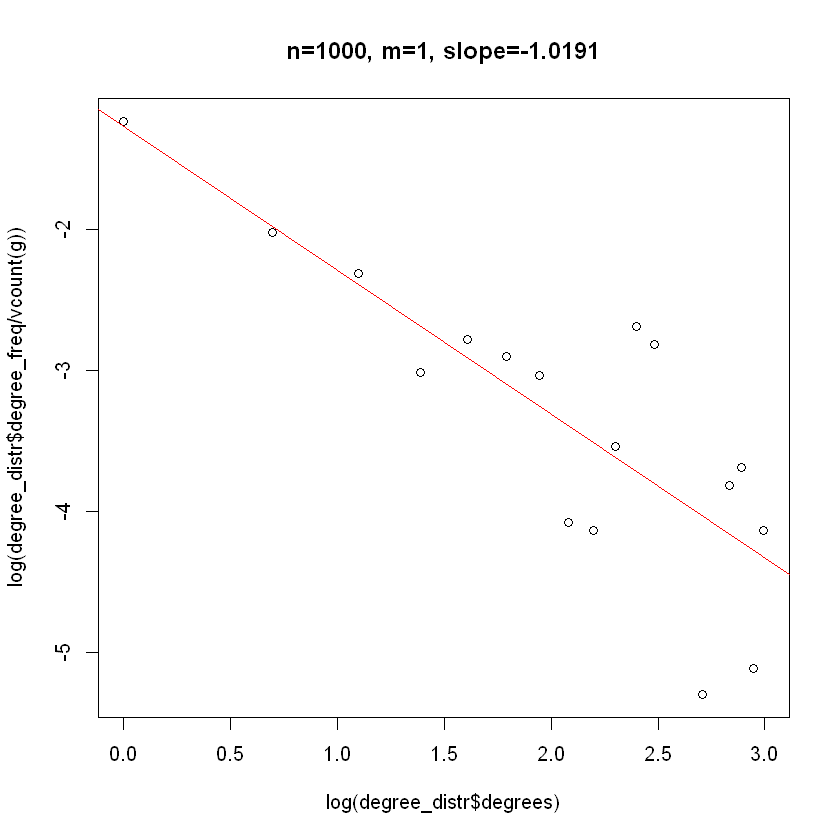

In [33]:
part_e(g1, 1)

[1] -1.187931

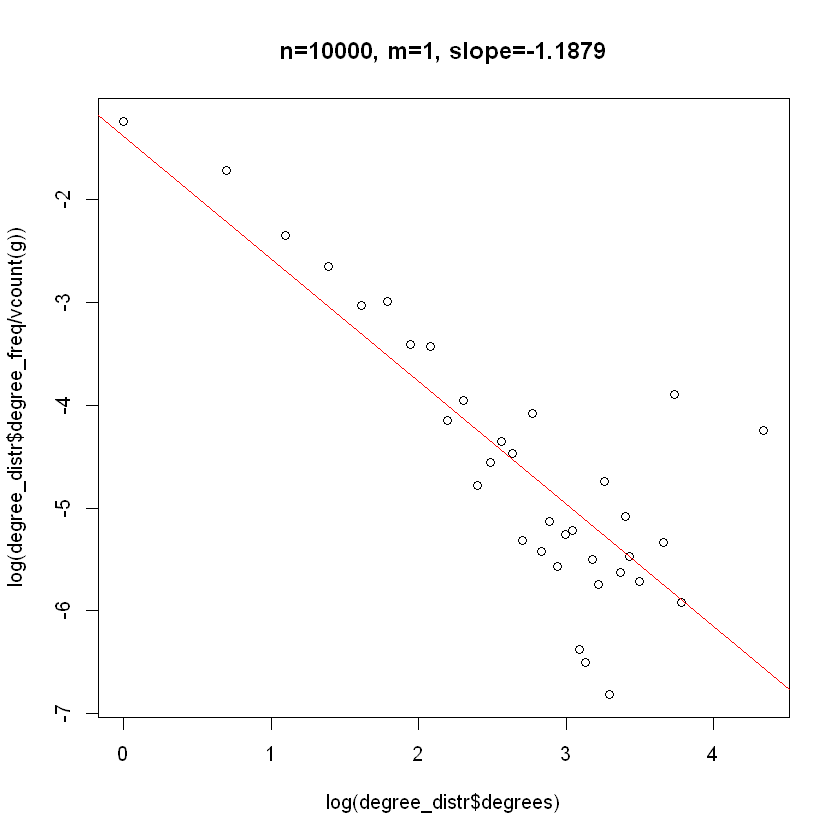

In [34]:
part_e(g2, 1)

## (f)

In [35]:
part_f = function(n, m, iters=1000){
    degrees = array(0, n)
    for(i in 1:iters){
        g <- sample_pa(n=n, m=m, directed=F)
        degrees = degrees + degree(g)
    }
    degrees = degrees / iters
    y = degrees
    x = n:1
    plot(x, y, type="l", main=sprintf("n=%d, m=%d", n, m))
}

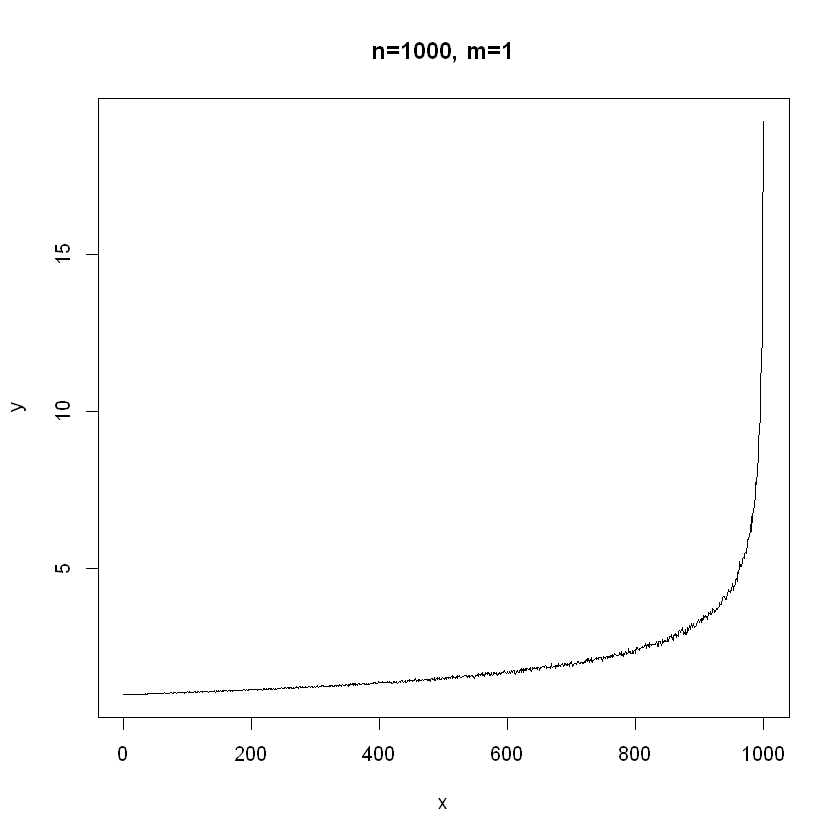

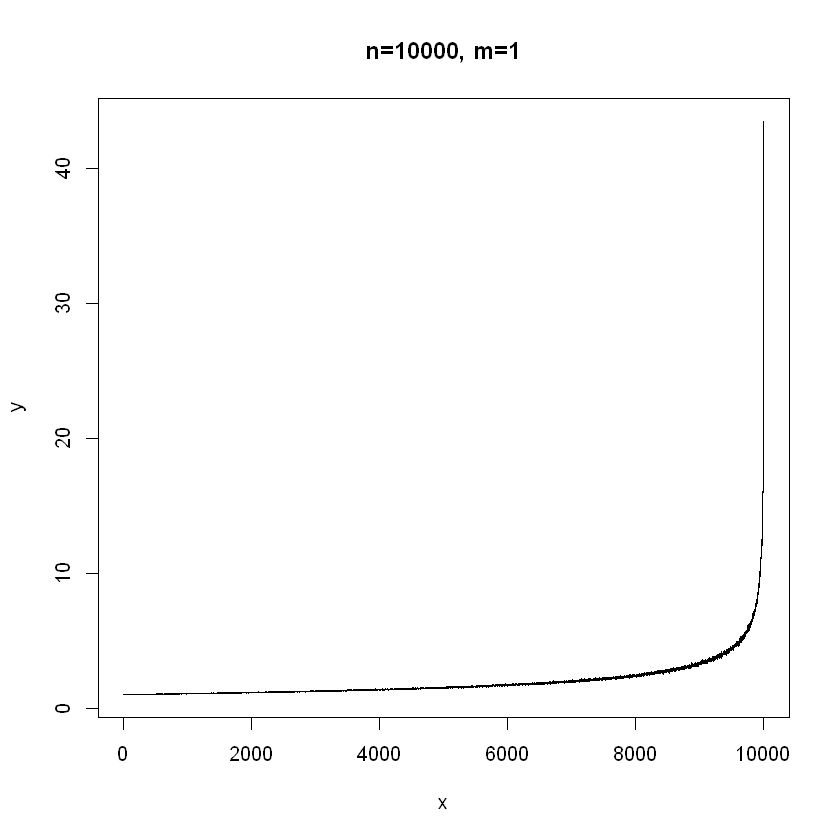

In [36]:
for(n in c(1000, 10000)){
    part_f(n, 1)
}

## (g)

#### (a, b, c)

n=1000, m=2, modularity=0.5298


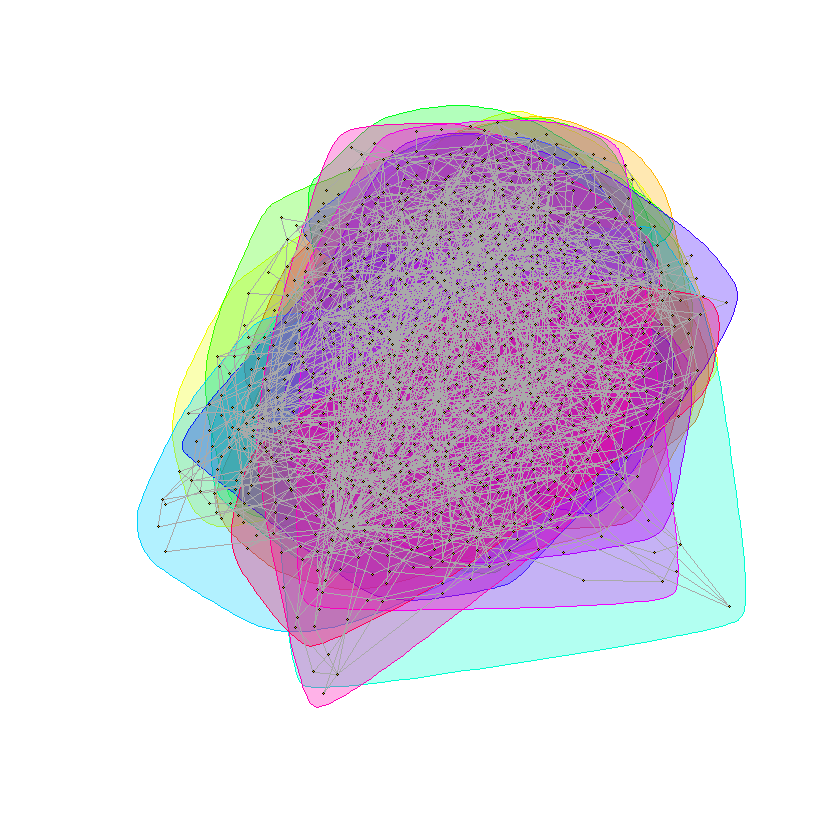

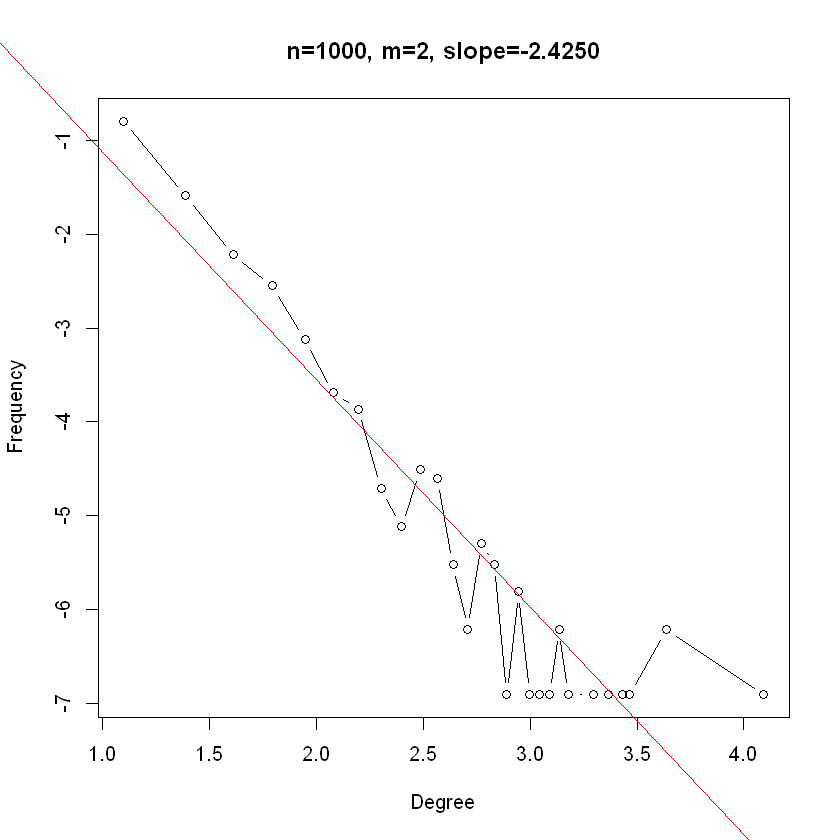

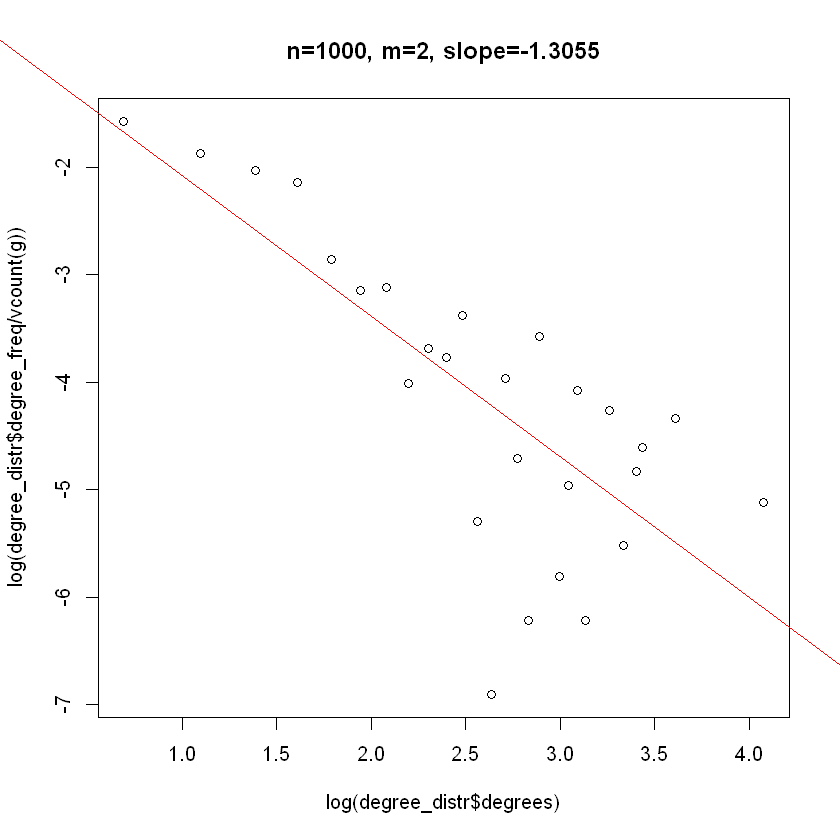

n=10000, m=2, modularity=0.5292


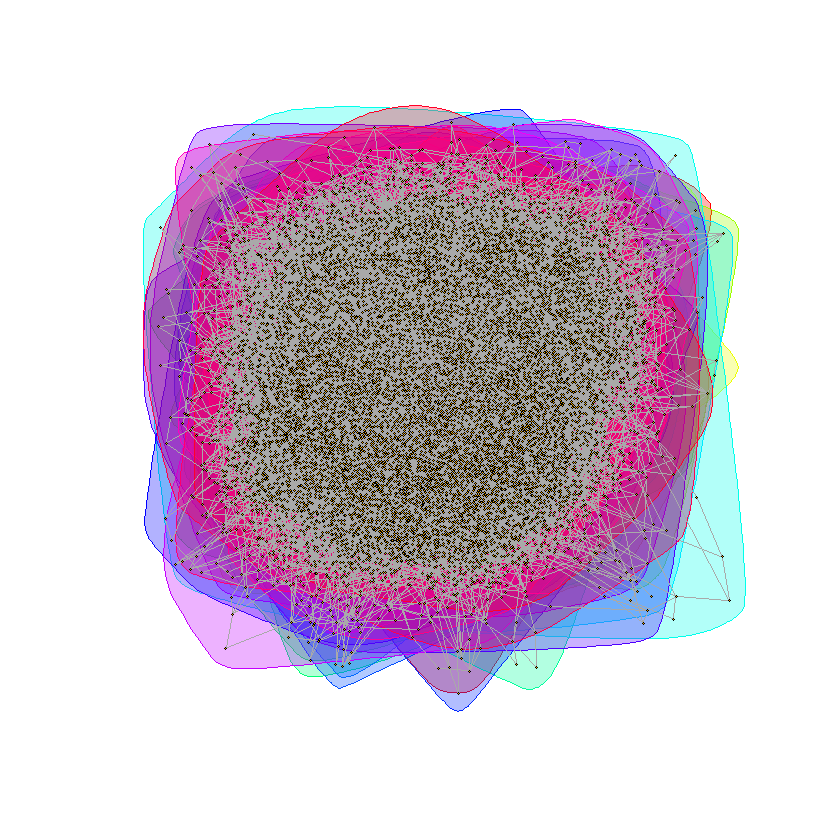

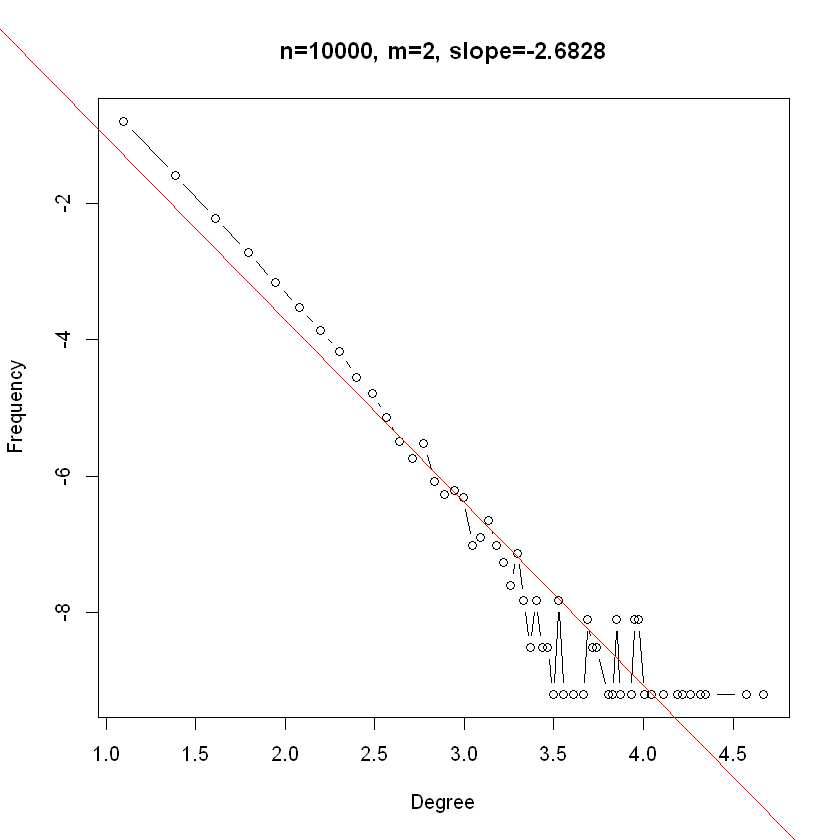

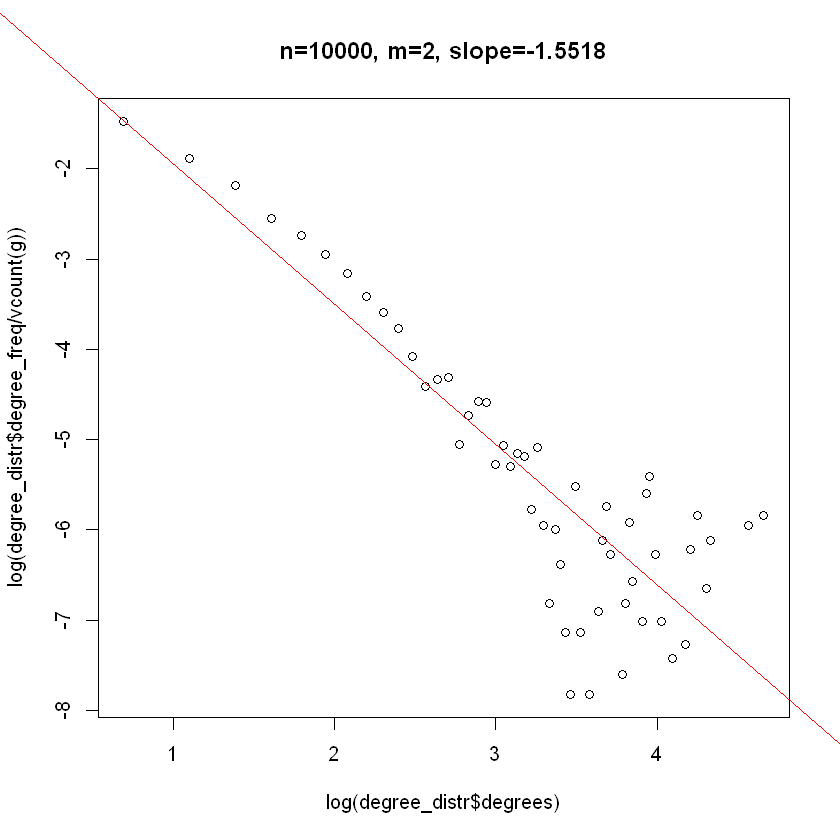

n=1000, m=5, modularity=0.2789


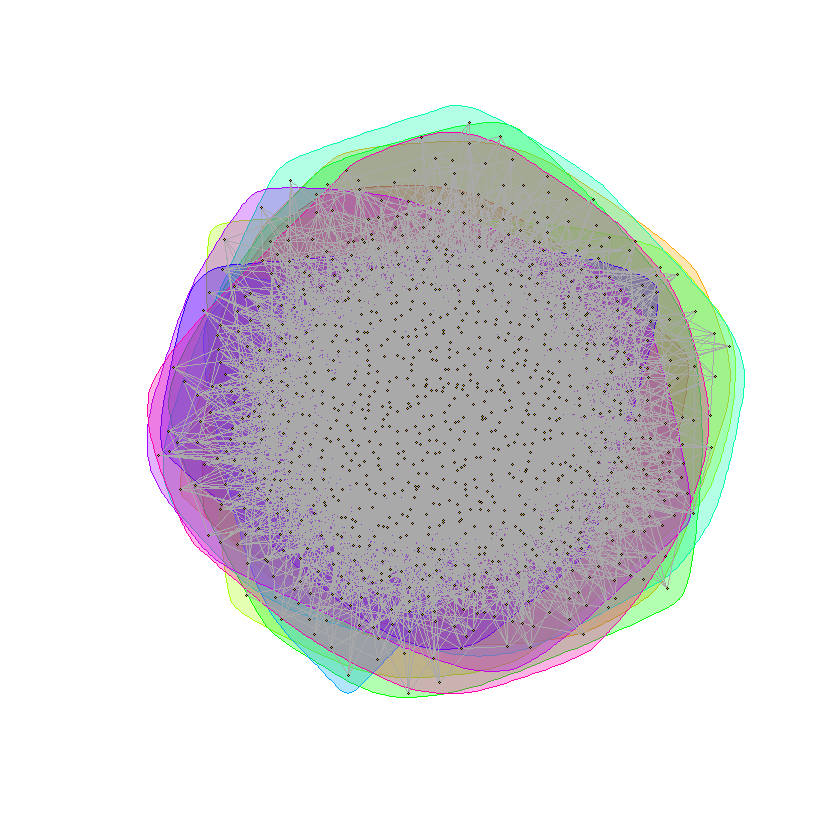

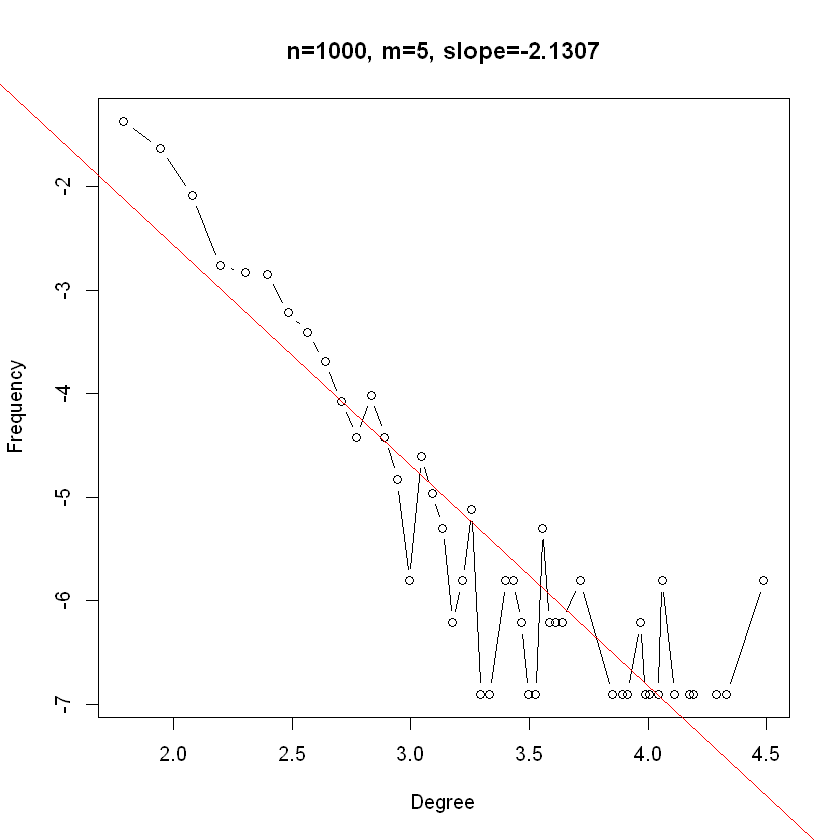

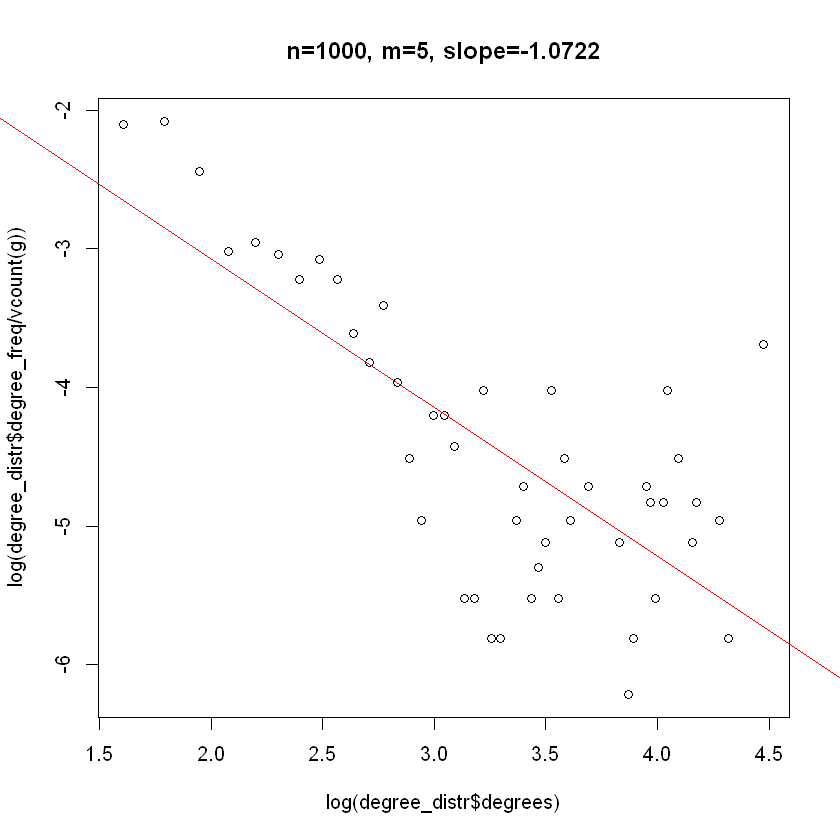

n=10000, m=5, modularity=0.2748


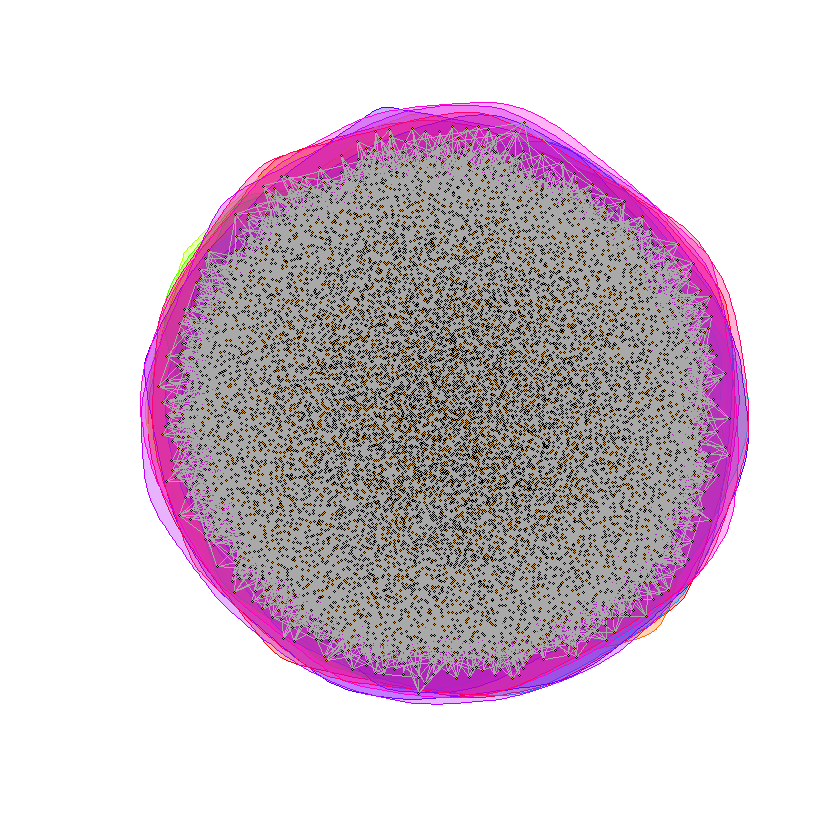

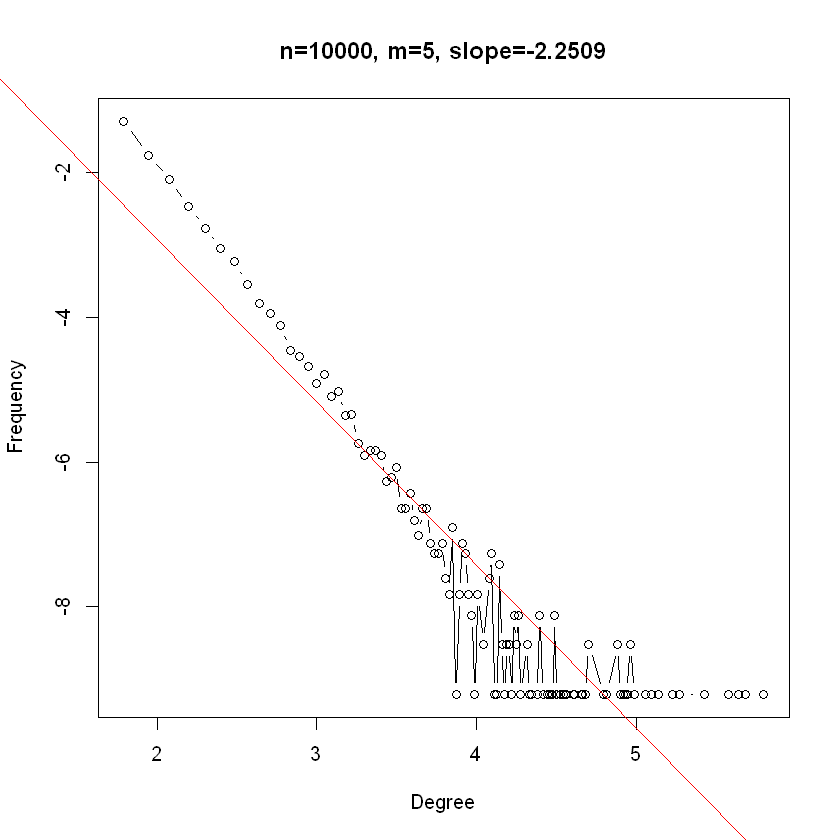

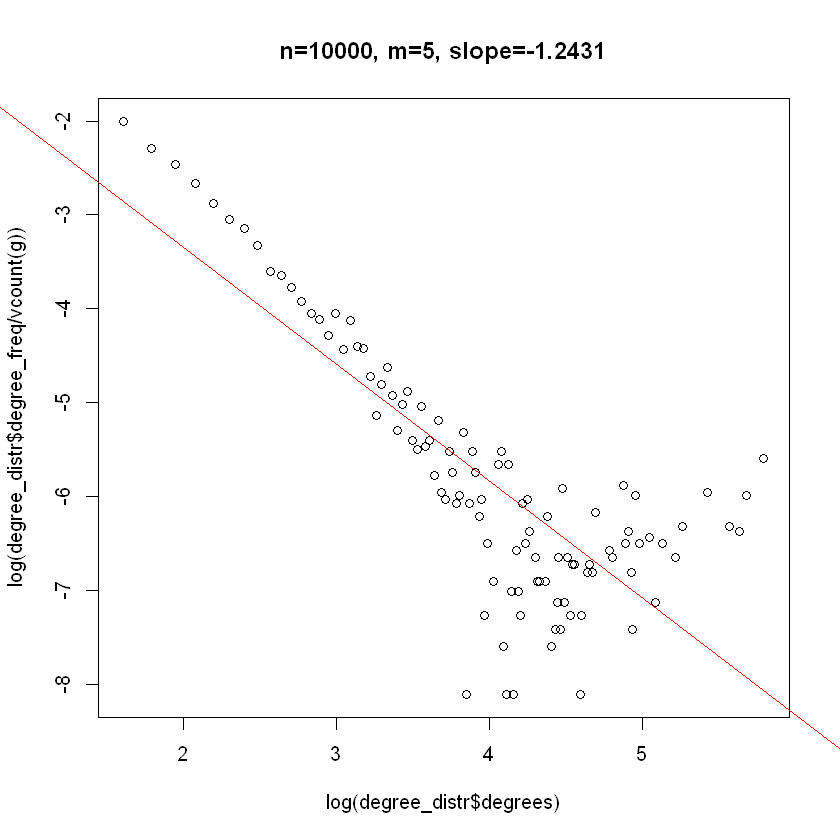

In [39]:
for(m in c(2, 5)){
    for(n in c(1000, 10000)){
        g <- sample_pa(n=n, m=m, directed=F)
        #(a,b,c)
        comms = cluster_fast_greedy(g, modularity=TRUE)
        plot(g, mark.groups=groups(comms), vertex.size=1, vertex.label=NA)
        printf("n=%d, m=%d, modularity=%.4f\n", n, m, modularity(comms))
        #(d)
        draw_degree_distribution(g, m)
        #(e)
        part_e(g, m)
    }
}

In [38]:
#### (f)

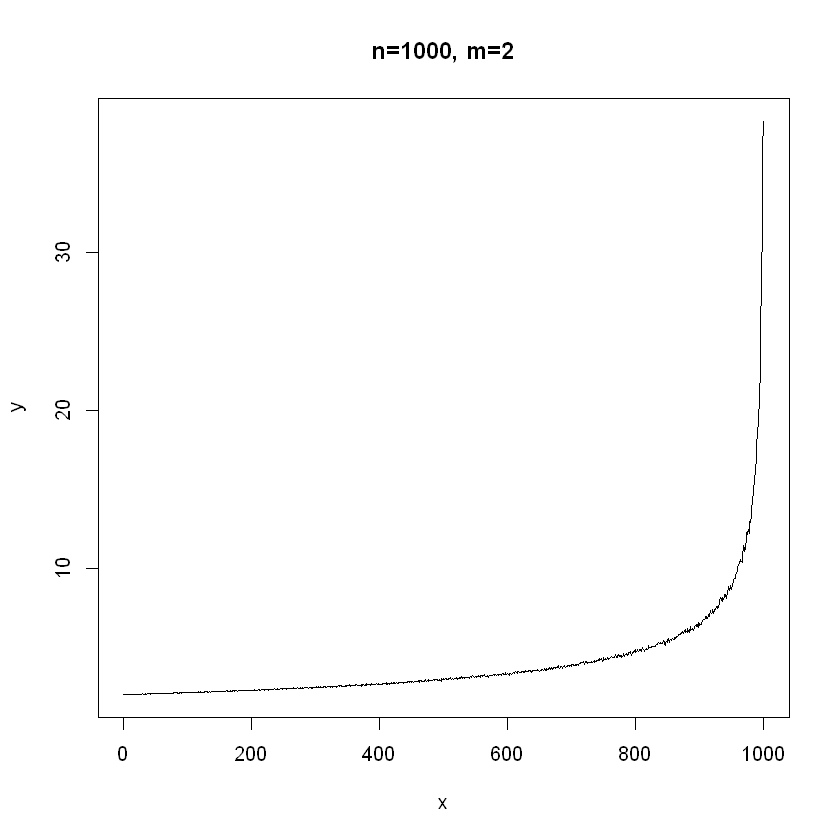

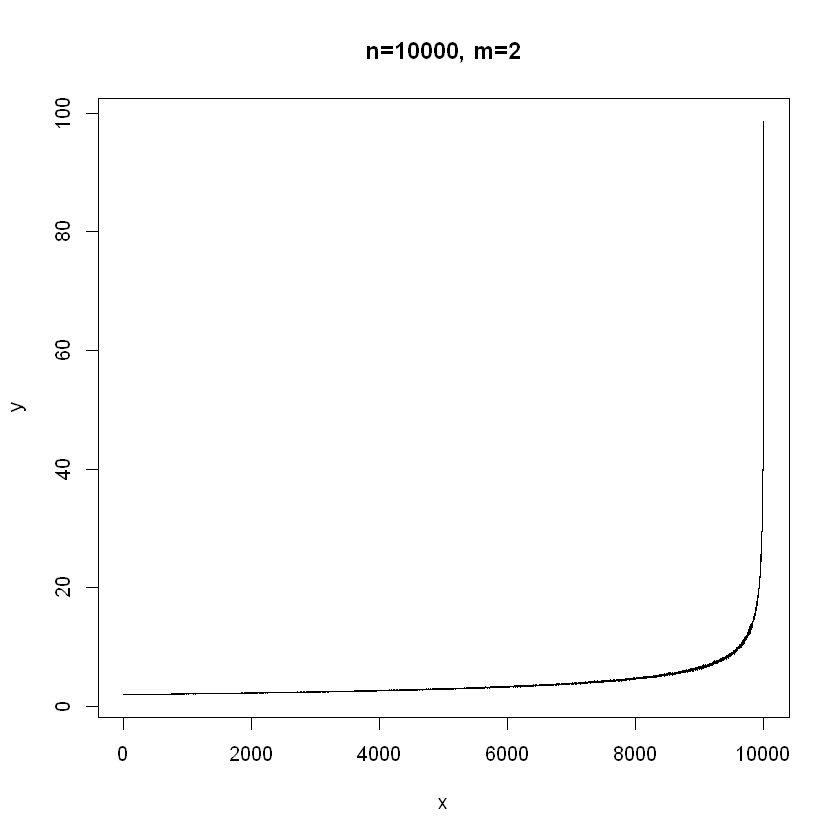

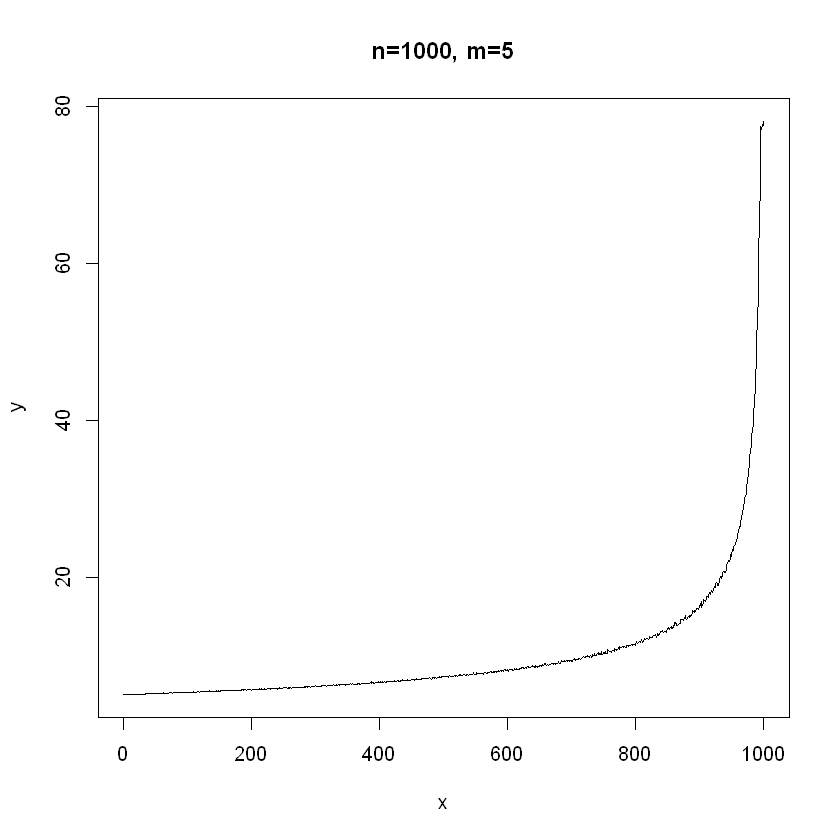

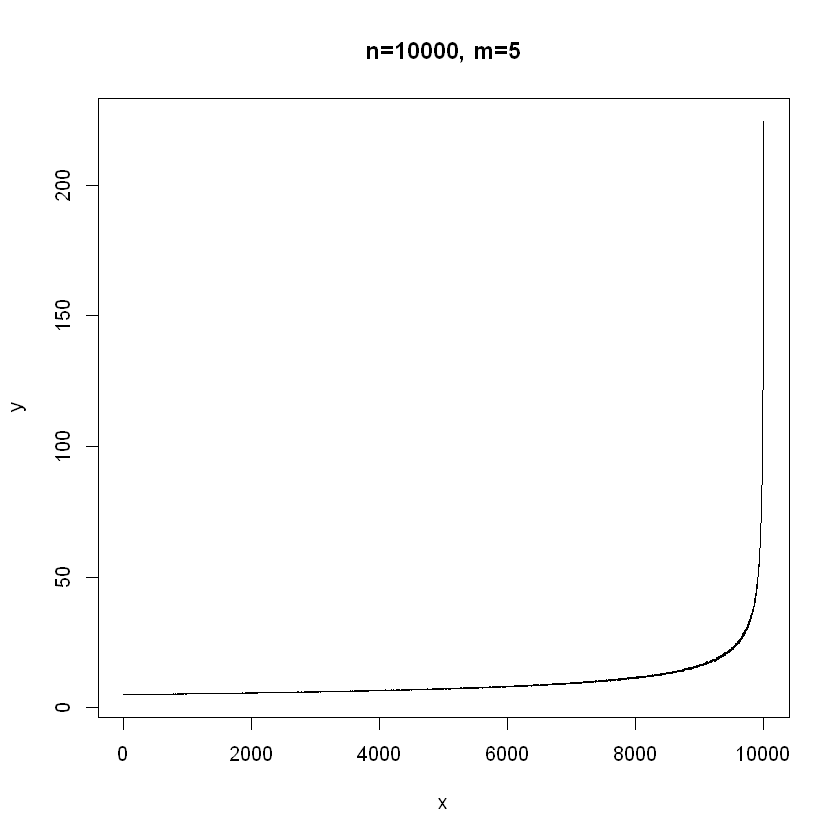

In [40]:
for(m in c(2, 5)){
    for(n in c(1000, 10000)){
        part_f(n,m)
    }
}

## (h)

[1] 0.9338392
[1] 35


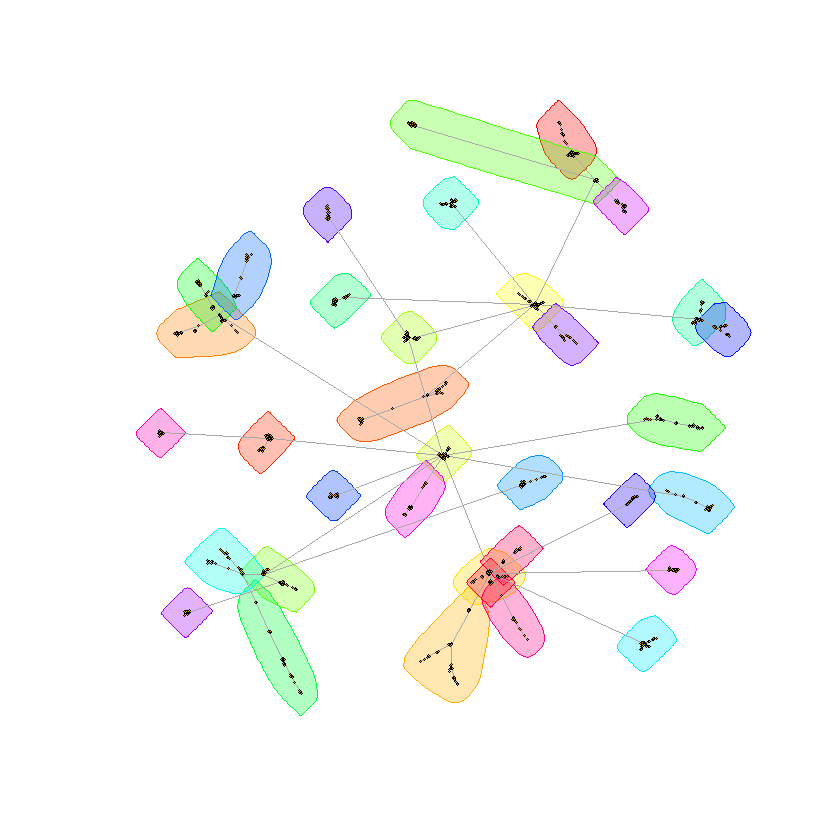

In [41]:
g <- sample_pa(n=1000, m=1, directed=F)
comms = cluster_fast_greedy(g, modularity=TRUE)
print(modularity(comms))
print(length(comms))
plot(g, mark.groups=groups(comms), vertex.size=1, vertex.label=NA)

[1] 0.9341058
[1] 34


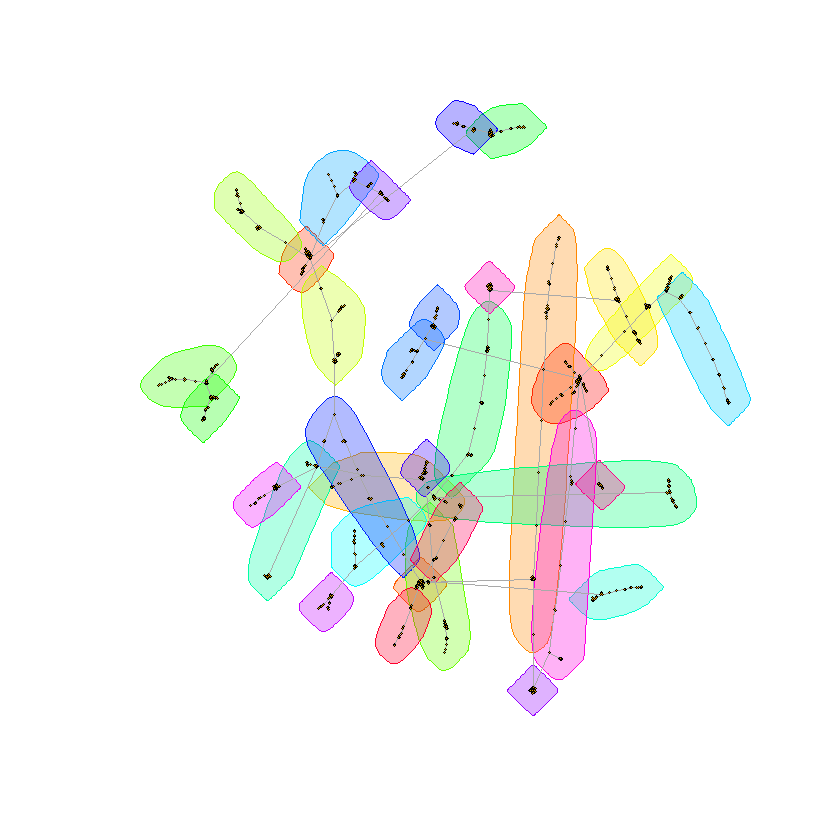

In [42]:
g_new <- sample_degseq(degree(g), method="vl")
comms_new = cluster_fast_greedy(g_new, modularity=TRUE)
plot(g_new, mark.groups=groups(comms_new), vertex.size=1, vertex.label=NA)
print(modularity(comms_new))
print(length(comms_new))